In [87]:
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
import fiona
import geopandas as gpd
import numpy as np
import geopandas as gp
from pyproj import CRS

In [88]:
# Open the dataset from the file
shapefile = fiona.open('../data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not shapefile:
    print('Error: could not open shapefile')

In [89]:
### Let's get the driver from this file
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

### How many features are contained in this Shapefile?
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

### What is the shapefiles's projection?
# Get the spatial reference
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

# Let's pull out a specific feature from the shapefile
feature = shapefile[0]

### What is the features's geometry? is it a point? a polyline? a polygon?
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

### How many properties are in the shapefile, and what are their names?
properties = feature["properties"].keys()

# How many fields
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

# What are their names?
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))

Dataset driver is: ESRI Shapefile

The shapefile has 53776 feature(s)

The shapefiles spatial ref is:
 {'proj': 'tmerc', 'lat_0': 39.6682583333333, 'lon_0': -8.13310833333333, 'k': 1, 'x_0': 0, 'y_0': 0, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True} 

The features's geometry is: Polygon

Layer has 4 fields
Their names are: 
	AREA_ha
	CLC2012
	Legenda
	ID


In [90]:
shapefile.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('AREA_ha', 'float:19.11'),
               ('CLC2012', 'int:3'),
               ('Legenda', 'str:200'),
               ('ID', 'int:9')]),
  'geometry': 'Polygon'},
 'crs': {'proj': 'tmerc',
  'lat_0': 39.6682583333333,
  'lon_0': -8.13310833333333,
  'k': 1,
  'x_0': 0,
  'y_0': 0,
  'ellps': 'GRS80',
  'units': 'm',
  'no_defs': True},
 'crs_wkt': 'PROJCS["ETRS89_Portugal_TM06",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",39.6682583333333],PARAMETER["central_meridian",-8.13310833333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'}

In [91]:
feature = shapefile[0]
feature # The result is a Python dictionary

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('AREA_ha', 287.471753986),
              ('CLC2012', 111),
              ('Legenda', 'Tecido urbano contínuo'),
              ('ID', 1)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(18685.92039999913, -293338.38560000074),
    (18770.192800001358, -293402.0581),
    (18972.738299999502, -293371.5312),
    (19233.14839999989, -293341.4999999995),
    (19125.525399999286, -293461.46869999956),
    (18989.177699999796, -293583.15619999846),
    (18842.085000000836, -293690.1147000012),
    (18871.1250999989, -293752.0690000012),
    (18905.98149999976, -293796.8845000001),
    (18930.879099998972, -293856.63819999935),
    (18960.756000000198, -293881.5355999987),
    (19000.591799999675, -293889.00489999977),
    (19045.407199999812, -293884.02540000016),
    (19097.6918, -293859.12789999973),
    (19164.914900001313, -293846.6792000001),
    (19212.219999999652, -293871.57670000044),
    (19237.117399999028, -293906.

In [92]:
feature.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [93]:
print('id: ', feature['id']) #gives the id
print('Land Cover Class: ', feature['properties']['Legenda']) # gives the value of the classname attribute

print('\ngeometry: ', feature['geometry']) # gives the geometry, GeoJSON format

id:  0
Land Cover Class:  Tecido urbano contínuo

geometry:  {'type': 'Polygon', 'coordinates': [[(18685.92039999913, -293338.38560000074), (18770.192800001358, -293402.0581), (18972.738299999502, -293371.5312), (19233.14839999989, -293341.4999999995), (19125.525399999286, -293461.46869999956), (18989.177699999796, -293583.15619999846), (18842.085000000836, -293690.1147000012), (18871.1250999989, -293752.0690000012), (18905.98149999976, -293796.8845000001), (18930.879099998972, -293856.63819999935), (18960.756000000198, -293881.5355999987), (19000.591799999675, -293889.00489999977), (19045.407199999812, -293884.02540000016), (19097.6918, -293859.12789999973), (19164.914900001313, -293846.6792000001), (19212.219999999652, -293871.57670000044), (19237.117399999028, -293906.4330000003), (19224.66869999934, -293958.7175999983), (19184.83280000105, -294045.85859999934), (19197.19810000062, -294100.2661000006), (19251.568500000983, -294127.46869999944), (19354.75200000021, -294191.7499999992

<class 'shapely.geometry.polygon.Polygon'>


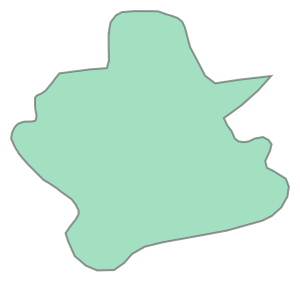

In [94]:
shapely_shape = shape(feature['geometry'])
print(type(shapely_shape))

shapely_shape

In [95]:
shapefile = gpd.read_file('../data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
shapefile.head()

,AREA_ha,CLC2012,Legenda,ID,geometry
0,287.471754,111,Tecido urbano contínuo,1,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,275.900895,111,Tecido urbano contínuo,2,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,101.100914,111,Tecido urbano contínuo,3,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,28.932375,111,Tecido urbano contínuo,4,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,109.973855,111,Tecido urbano contínuo,5,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [96]:
shapefile_filtered = shapefile.filter(['Legenda', 'geometry'])
shapefile_filtered.head()

,Legenda,geometry
0,Tecido urbano contínuo,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,Tecido urbano contínuo,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,Tecido urbano contínuo,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,Tecido urbano contínuo,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,Tecido urbano contínuo,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [97]:
initial_crs = shapefile.crs
initial_crs

{'proj': 'tmerc',
 'lat_0': 39.6682583333333,
 'lon_0': -8.13310833333333,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [98]:
from pyproj import CRS
CRS(shapefile.crs)

<Projected CRS: +proj=tmerc +lat_0=39.6682583333333 +lon_0=-8.1331 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [99]:
shapefile.bounds

,minx,miny,maxx,maxy
0,17080.0215,-294951.4999,19380.1993,-292804.0811
1,25014.5391,-293571.3437,28100.6895,-291199.6236
2,2126.1274,-289232.5311,3577.8242,-287665.0312
3,-48281.8595,-285265.3470,-47693.6214,-284303.3125
4,-21405.6196,-285051.4061,-19507.7148,-284032.0916
...,...,...,...,...
53771,-48575.9047,167635.7850,-46146.6718,169701.0000
53772,-55076.6484,204694.1563,-50910.5976,208331.8906
53773,-59396.1259,223007.5131,-52912.2656,225591.9688
53774,-61277.9374,243545.4956,-51113.0195,252421.6141


In [100]:
shapefile = shapefile.to_crs({'init': 'epsg:4326'})

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [101]:
#shapefile.geometry = shapefile.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

In [102]:
shapefile.bounds

,minx,miny,maxx,maxy
0,-7.941171,37.010940,-7.915333,37.030284
1,-7.851944,37.023193,-7.817265,37.044540
2,-8.109201,37.062634,-8.092880,37.076760
3,-8.676275,37.097166,-8.669628,37.105817
4,-8.373929,37.100102,-8.352574,37.109262
...,...,...,...,...
53771,-8.712066,41.176503,-8.683211,41.195187
53772,-8.793162,41.509872,-8.742993,41.542466
53773,-8.846448,41.674274,-8.768713,41.697963
53774,-8.871157,41.859026,-8.749444,41.939640


In [103]:
unique= np.unique(shapefile['Legenda'])
print('List of Land Cover Classes:')
unique

List of Land Cover Classes:


array(['Aeroportos e aeródromos',
       'Agricultura com espaços naturais e semi-naturais', 'Arrozais',
       'Culturas temporárias de regadio',
       'Culturas temporárias de sequeiro',
       'Culturas temporárias e/ou pastagens associadas a culturas permanentes',
       'Cursos de água', 'Desembocaduras fluviais',
       'Equipamentos desportivos, culturais e de lazer e zonas históricas',
       'Espaços verdes urbanos',
       'Florestas abertas, cortes e novas plantações',
       'Florestas de folhosas', 'Florestas de resinosas',
       'Florestas mistas', 'Indústria, comércio e equipamentos gerais',
       'Lagoas costeiras', 'Matos', 'Oceano', 'Olivais',
       'Pastagens permanentes', 'Paúis', 'Planos de água', 'Pomares',
       'Praias, dunas e areais',
       'Redes viárias e ferroviárias e espaços associados', 'Rocha nua',
       'Salinas e aquicultura litoral', 'Sapais',
       'Sistemas agro-florestais',
       'Sistemas culturais e parcelares complexos',
       'Tecido

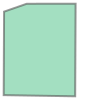

In [104]:
polygon = Polygon([ # from manifest.safe
    (39.073198659648654, -8.8871765),
    (39.0526886902376, -8.894318),
    (38.906045290370265 ,-8.945374),
    (38.760328595167564 ,-8.996094),
    (38.755193805393134 ,-10.151337),
    (39.74439520181332 ,-10.167633),
    (39.750212021802014 ,-8.886078),
    (39.073198659648654 ,-8.8871765)
])
polygon

In [105]:
imageBounds = gp.GeoDataFrame(crs={'init': 'epsg:4326'})

In [106]:
imageBounds.geometry = [polygon]
imageBounds.geometry = imageBounds.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

In [107]:
imageBounds.bounds

,minx,miny,maxx,maxy
0,-10.167633,38.755194,-8.886078,39.750212


In [108]:
shapefile.bounds

,minx,miny,maxx,maxy
0,-7.941171,37.010940,-7.915333,37.030284
1,-7.851944,37.023193,-7.817265,37.044540
2,-8.109201,37.062634,-8.092880,37.076760
3,-8.676275,37.097166,-8.669628,37.105817
4,-8.373929,37.100102,-8.352574,37.109262
...,...,...,...,...
53771,-8.712066,41.176503,-8.683211,41.195187
53772,-8.793162,41.509872,-8.742993,41.542466
53773,-8.846448,41.674274,-8.768713,41.697963
53774,-8.871157,41.859026,-8.749444,41.939640


In [109]:
intersected = gp.sjoin(shapefile , imageBounds, how='inner', op='intersects', lsuffix='left', rsuffix='right')
intersected = intersected.reset_index()
intersected 

,index,AREA_ha,CLC2012,Legenda,ID,geometry,index_right
0,107,1.740527e+02,111,Tecido urbano contínuo,108,"POLYGON ((-9.27768 38.76588, -9.27746 38.76555...",0
1,108,7.025961e+01,111,Tecido urbano contínuo,109,"POLYGON ((-9.25850 38.76457, -9.25850 38.76158...",0
2,109,5.201295e+01,111,Tecido urbano contínuo,110,"POLYGON ((-9.21069 38.76698, -9.21064 38.76633...",0
3,110,5.777329e+02,111,Tecido urbano contínuo,111,"POLYGON ((-9.22487 38.76998, -9.22474 38.76907...",0
4,111,3.026607e+01,111,Tecido urbano contínuo,112,"POLYGON ((-9.15237 38.77167, -9.15397 38.77135...",0
...,...,...,...,...,...,...,...
2606,53662,3.946712e+01,512,Planos de água,53663,"POLYGON ((-9.30538 39.32667, -9.30438 39.32591...",0
2607,53666,5.349578e+01,512,Planos de água,53667,"POLYGON ((-9.12876 39.36121, -9.12819 39.36034...",0
2608,53756,5.478565e+02,521,Lagoas costeiras,53757,"POLYGON ((-9.22812 39.43133, -9.22765 39.43071...",0
2609,53768,2.809937e+04,522,Desembocaduras fluviais,53769,"POLYGON ((-8.99046 38.92315, -8.99021 38.92267...",0


In [110]:
intersected.crs

{'init': 'epsg:4326'}

In [111]:
intersected.bounds

,minx,miny,maxx,maxy
0,-9.290231,38.748262,-9.271269,38.765971
1,-9.269420,38.756289,-9.258351,38.767022
2,-9.223762,38.765308,-9.210637,38.771348
3,-9.259214,38.740093,-9.205557,38.772182
4,-9.155668,38.771354,-9.148402,38.778720
...,...,...,...,...
2606,-9.317734,39.321207,-9.299920,39.333992
2607,-9.137997,39.352063,-9.108531,39.362436
2608,-9.236594,39.385820,-9.183275,39.431828
2609,-9.323687,38.603732,-8.908901,38.937196


In [112]:
#intersected = intersected.to_crs(fiona.crs.from_epsg(32629))
intersected.crs = initial_crs
intersected.crs

{'proj': 'tmerc',
 'lat_0': 39.6682583333333,
 'lon_0': -8.13310833333333,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [113]:
intersected.bounds

,minx,miny,maxx,maxy
0,-9.290231,38.748262,-9.271269,38.765971
1,-9.269420,38.756289,-9.258351,38.767022
2,-9.223762,38.765308,-9.210637,38.771348
3,-9.259214,38.740093,-9.205557,38.772182
4,-9.155668,38.771354,-9.148402,38.778720
...,...,...,...,...
2606,-9.317734,39.321207,-9.299920,39.333992
2607,-9.137997,39.352063,-9.108531,39.362436
2608,-9.236594,39.385820,-9.183275,39.431828
2609,-9.323687,38.603732,-8.908901,38.937196


In [114]:
import os
# create a products directory within the data dir which won't be uploaded to Github
img_dir = '../data/shapefiles/shapefile_compressed/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [115]:
intersected.to_file(img_dir + 'shp_2012_IMG_DATA_1.shp')